# ENRON FRAUD ANALYSIS

Project Introduction
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. 
In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, 
including tens of thousands of emails and detailed financial data for top executives. 

In this project, you will play detective, 
and put your new skills to use by building a person of interest identifier based on financial and email data made public as a result of the Enron scandal. 
To assist you in your detective work, we've combined this data with a hand-generated list of persons of interest in the fraud case, 
which means individuals who were indicted, reached a settlement, or plea deal with the government, or testified in exchange for prosecution immunity.

# Data Description


The features in the data fall into three major types, namely financial features, email features and POI labels.

 - financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

- email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

- POI label: [‘poi’] (boolean, represented as integer)

In [1]:
import sys
sys.path.append('final_project/')
import poi_email_addresses
import numpy as np

### IMPORTING THE DATASET

In [2]:
#poi_id.py
#!/usr/bin/python

import pickle

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [2]:
type(data_dict)

## DATA ANALYSIS

In [3]:
import pandas as pd

enron_list=[]
conv_dict = data_dict

for person in conv_dict:
    conv_dict[person]['name'] = person
    for feature in conv_dict[person]:
        if conv_dict[person][feature]=='NaN' or conv_dict[person][feature]=='' or conv_dict[person][feature]==None:
            conv_dict[person][feature] = None
    enron_list.append(conv_dict[person])    

type(conv_dict['METTS MARK']['deferral_payments'])

NoneType

In [4]:
enron_df = pd.DataFrame(enron_list)

enron_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,600000.0,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299.0,29.0,38.0,1.0,...,METTS MARK,1740.0,False,585062.0,NaN,365788.0,702.0,807.0,1061827.0,585062.0
1,1200000.0,1295738.0,-1386055.0,NaN,None,6680544.0,11200.0,NaN,NaN,NaN,...,BAXTER JOHN C,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
2,350000.0,NaN,-400729.0,NaN,steven.elliott@enron.com,4890344.0,78552.0,NaN,NaN,NaN,...,ELLIOTT STEVEN,12961.0,False,1788391.0,NaN,170941.0,NaN,NaN,211725.0,6678735.0
3,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850.0,NaN,12.0,10.0,0.0,...,CORDES WILLIAM R,NaN,False,386335.0,NaN,NaN,58.0,764.0,NaN,1038185.0
4,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,...,HANNON KEVIN P,11350.0,True,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0


In [5]:
poi = enron_df[enron_df['poi'] != False]
non_poi = enron_df[enron_df['poi'] != True]


print('Total Number of individuals: ',len(enron_df))
print('Number of POIs: ',len(poi))
print('Number of non-POIs: ',len(non_poi))

Total Number of individuals:  146
Number of POIs:  18
Number of non-POIs:  128


In [6]:
print('Number of missing datapoints for each feature:\n\n',enron_df.isnull().sum())

Number of missing datapoints for each feature:

 bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
name                           0
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64


In [7]:
enron_df[enron_df['director_fees'].isnull()]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,600000.0,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299.0,29.0,38.0,1.0,...,METTS MARK,1740.0,False,585062.0,NaN,365788.0,702.0,807.0,1061827.0,585062.0
1,1200000.0,1295738.0,-1386055.0,NaN,None,6680544.0,11200.0,NaN,NaN,NaN,...,BAXTER JOHN C,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
2,350000.0,NaN,-400729.0,NaN,steven.elliott@enron.com,4890344.0,78552.0,NaN,NaN,NaN,...,ELLIOTT STEVEN,12961.0,False,1788391.0,NaN,170941.0,NaN,NaN,211725.0,6678735.0
3,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850.0,NaN,12.0,10.0,0.0,...,CORDES WILLIAM R,NaN,False,386335.0,NaN,NaN,58.0,764.0,NaN,1038185.0
4,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,...,HANNON KEVIN P,11350.0,True,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
5,325000.0,NaN,NaN,NaN,kristina.mordaunt@enron.com,NaN,35018.0,NaN,NaN,NaN,...,MORDAUNT KRISTINA M,1411.0,False,208510.0,NaN,267093.0,NaN,NaN,628522.0,208510.0
6,NaN,1848227.0,NaN,NaN,rockford.meyer@enron.com,493489.0,NaN,28.0,0.0,0.0,...,MEYER ROCKFORD G,NaN,False,462384.0,NaN,NaN,22.0,232.0,1848227.0,955873.0
7,2600000.0,NaN,NaN,NaN,jeffrey.mcmahon@enron.com,1104054.0,137108.0,48.0,58.0,26.0,...,MCMAHON JEFFREY,297353.0,False,558801.0,NaN,370448.0,2228.0,2355.0,4099771.0,1662855.0
8,1150000.0,2157527.0,-934484.0,NaN,mark.haedicke@enron.com,608750.0,76169.0,1941.0,180.0,61.0,...,HAEDICKE MARK E,52382.0,False,524169.0,-329825.0,374125.0,1847.0,4009.0,3859065.0,803094.0
9,400000.0,1130036.0,-33333.0,NaN,greg.piper@enron.com,880290.0,43057.0,222.0,61.0,48.0,...,PIPER GREGORY F,778.0,False,409554.0,-409554.0,197091.0,742.0,1238.0,1737629.0,880290.0


In [8]:
enron_data = enron_df.drop(['director_fees','email_address','loan_advances'], axis=1)

In [9]:
enron_df[enron_df['poi'] == True]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
4,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,...,HANNON KEVIN P,11350.0,True,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
16,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,11.0,...,COLWELL WESLEY,101740.0,True,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
30,700000.0,214678.0,-100000.0,NaN,paula.rieker@enron.com,1635238.0,33271.0,82.0,35.0,48.0,...,RIEKER PAULA H,1950.0,True,283649.0,NaN,249201.0,1258.0,1328.0,1099100.0,1918887.0
40,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,...,KOPPER MICHAEL J,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
52,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,...,SHELBY REX,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
59,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,609.0,...,DELAINEY DAVID W,1661.0,True,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
64,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,LAY KENNETH L,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
75,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,15.0,...,BOWEN JR RAYMOND M,1621.0,True,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
81,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,BELDEN TIMOTHY N,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
85,1300000.0,NaN,-1386055.0,NaN,andrew.fastow@enron.com,NaN,55921.0,NaN,NaN,NaN,...,FASTOW ANDREW S,277464.0,True,1794412.0,NaN,440698.0,NaN,NaN,2424083.0,1794412.0


In [10]:
enron_data[enron_data['poi'] == False]

,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,600000.0,NaN,NaN,NaN,94299.0,29.0,38.0,1.0,NaN,METTS MARK,1740.0,False,585062.0,NaN,365788.0,702.0,807.0,1061827.0,585062.0
1,1200000.0,1295738.0,-1386055.0,6680544.0,11200.0,NaN,NaN,NaN,1586055.0,BAXTER JOHN C,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
2,350000.0,NaN,-400729.0,4890344.0,78552.0,NaN,NaN,NaN,NaN,ELLIOTT STEVEN,12961.0,False,1788391.0,NaN,170941.0,NaN,NaN,211725.0,6678735.0
3,NaN,NaN,NaN,651850.0,NaN,12.0,10.0,0.0,NaN,CORDES WILLIAM R,NaN,False,386335.0,NaN,NaN,58.0,764.0,NaN,1038185.0
5,325000.0,NaN,NaN,NaN,35018.0,NaN,NaN,NaN,NaN,MORDAUNT KRISTINA M,1411.0,False,208510.0,NaN,267093.0,NaN,NaN,628522.0,208510.0
6,NaN,1848227.0,NaN,493489.0,NaN,28.0,0.0,0.0,NaN,MEYER ROCKFORD G,NaN,False,462384.0,NaN,NaN,22.0,232.0,1848227.0,955873.0
7,2600000.0,NaN,NaN,1104054.0,137108.0,48.0,58.0,26.0,694862.0,MCMAHON JEFFREY,297353.0,False,558801.0,NaN,370448.0,2228.0,2355.0,4099771.0,1662855.0
8,1150000.0,2157527.0,-934484.0,608750.0,76169.0,1941.0,180.0,61.0,983346.0,HAEDICKE MARK E,52382.0,False,524169.0,-329825.0,374125.0,1847.0,4009.0,3859065.0,803094.0
9,400000.0,1130036.0,-33333.0,880290.0,43057.0,222.0,61.0,48.0,NaN,PIPER GREGORY F,778.0,False,409554.0,-409554.0,197091.0,742.0,1238.0,1737629.0,880290.0
10,NaN,2964506.0,NaN,2282768.0,4994.0,17.0,10.0,17.0,NaN,HUMPHREY GENE E,NaN,False,NaN,NaN,130724.0,119.0,128.0,3100224.0,2282768.0


## SALARIES

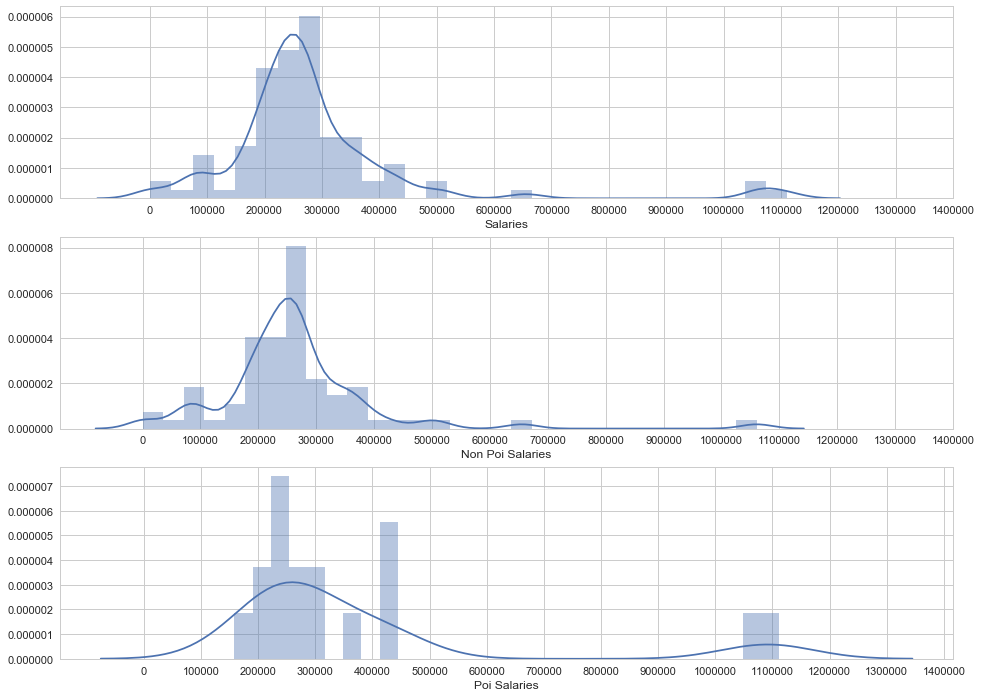

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##CREATING A HISTOGRAM OF SALARIES FOR POIS AND NON-POIS AS WELL AS GENERAL DATA

hist = enron_data[enron_data['salary'] < 26704229.0] ###<---OUTLIER!!!!!

sns.set(style='whitegrid', font='sans-serif', font_scale=1.1)

fig,axes = plt.subplots(ncols=1,nrows=3, figsize=(16,12))


ax1 = sns.distplot(hist['salary'].dropna(), ax=axes[0], bins=30, kde=True, hist=True)
ax1.set_xlabel('Salaries');
ax1.set_xticks(range(0,1500000,100000))


ax2 = sns.distplot((hist[hist['poi']==False])['salary'].dropna(), ax=axes[1], bins=30, kde=True, hist=True)
ax2.set_xlabel('Non Poi Salaries');
ax2.set_xticks(range(0,1500000,100000))


ax3 = sns.distplot((hist[hist['poi']==True])['salary'].dropna(), ax=axes[2], bins=30, kde=True, hist=True)
ax3.set_xlabel('Poi Salaries');
ax3.set_xticks(range(0,1500000,100000));

## SALARIES

In [12]:
np.max(enron_data['salary'])

26704229.0

#### NOTED OUTLIER ON SALARY:

In [13]:
enron_data[enron_data['salary'] == 26704229.0] ##outlier total

,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
103,97343619.0,32083396.0,-27992891.0,311764000.0,5235198.0,NaN,NaN,NaN,48521928.0,TOTAL,42667589.0,False,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0


From the data we have, we noted an outlier called TOTAL which seems to be the sum of salaries.

On poi's, not one poi seems to have a salary below 150,000. Salaries seem to fall between 150,000 and 450,000 with a number of people of earning about 1.1m as salary.

## BONUS

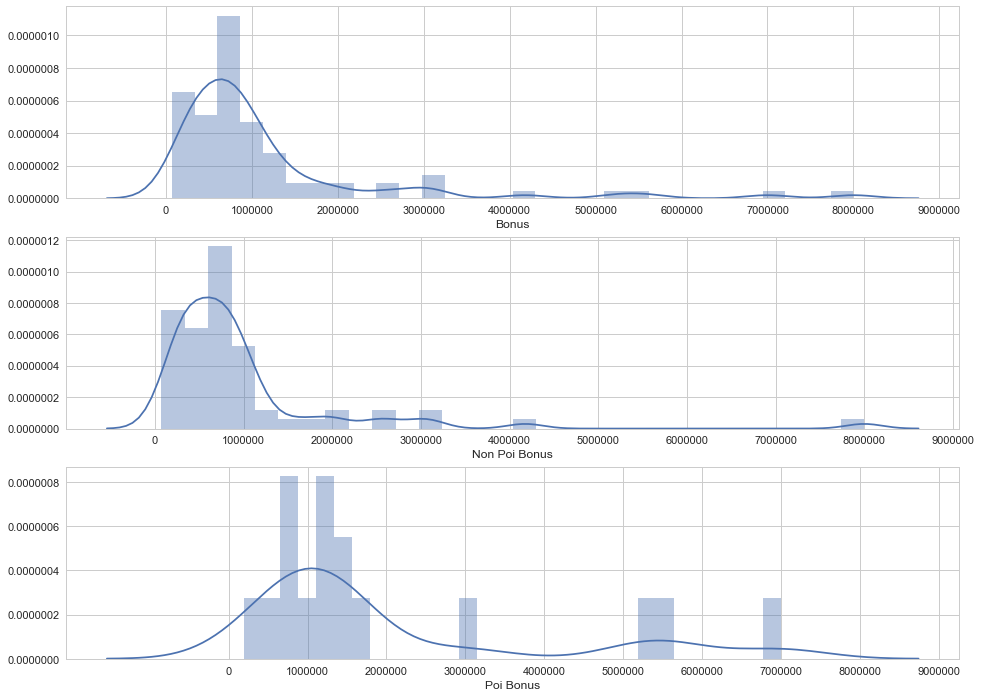

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

hist = enron_data[enron_data['salary'] < 26704229.0] ###<---OUTLIER!!!!!

sns.set(style='whitegrid', font='sans-serif', font_scale=1.1)

fig,axes = plt.subplots(ncols=1,nrows=3, figsize=(16,12))


ax1 = sns.distplot(hist['bonus'].dropna(), ax=axes[0], bins=30, kde=True, hist=True)
ax1.set_xlabel('Bonus');
ax1.set_xticks(range(0,10000000,1000000));


ax2 = sns.distplot((hist[hist['poi']==False])['bonus'].dropna(), ax=axes[1], bins=30, kde=True, hist=True)
ax2.set_xlabel('Non Poi Bonus');
ax2.set_xticks(range(0,10000000,1000000));


ax3 = sns.distplot((hist[hist['poi']==True])['bonus'].dropna(), ax=axes[2], bins=30, kde=True, hist=True)
ax3.set_xlabel('Poi Bonus');
ax3.set_xticks(range(0,10000000,1000000));

In [15]:
enron_data[((enron_data['poi']==True) & (enron_data['bonus'] > 6000000))]

,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
64,7000000.0,202911.0,-300000.0,34348384.0,99832.0,36.0,123.0,16.0,3600000.0,LAY KENNETH L,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0


In [16]:
enron_data[((enron_data['poi']==False) & (enron_data['bonus'] > 7000000))]

,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
42,8000000.0,NaN,NaN,4158995.0,49537.0,2585.0,528.0,411.0,2035380.0,LAVORATO JOHN J,1552.0,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0
103,97343619.0,32083396.0,-27992891.0,311764000.0,5235198.0,NaN,NaN,NaN,48521928.0,TOTAL,42667589.0,False,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0


## BONUS VS SALARY

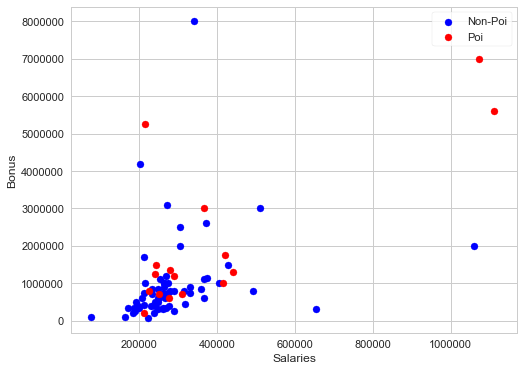

In [17]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='bonus',data=hist[hist['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='bonus',data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Bonus')


plt.legend(loc='best',frameon=True);

## LONG TERM INCENTIVE

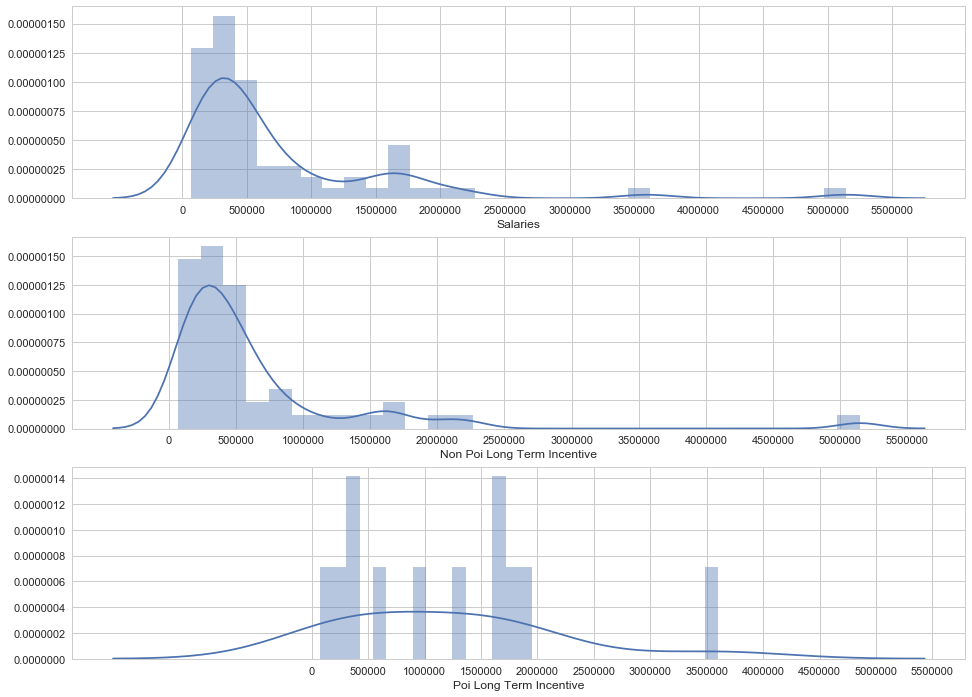

In [18]:
##CREATING A HISTOGRAM OF SALARIES FOR POIS AND NON-POIS AS WELL AS GENERAL DATA

hist = enron_data[enron_data['salary'] < 26704229.0] ###<---OUTLIER!!!!!

sns.set(style='whitegrid', font='sans-serif', font_scale=1.1)

fig,axes = plt.subplots(ncols=1,nrows=3, figsize=(16,12))


ax1 = sns.distplot(hist['long_term_incentive'].dropna(), ax=axes[0], bins=30, kde=True, hist=True)
ax1.set_xlabel('Salaries');
ax1.set_xticks(range(0,6000000,500000))


ax2 = sns.distplot((hist[hist['poi']==False])['long_term_incentive'].dropna(), ax=axes[1], bins=30, kde=True, hist=True)
ax2.set_xlabel('Non Poi Long Term Incentive');
ax2.set_xticks(range(0,6000000,500000))


ax3 = sns.distplot((hist[hist['poi']==True])['long_term_incentive'].dropna(), ax=axes[2], bins=30, kde=True, hist=True)
ax3.set_xlabel('Poi Long Term Incentive');
ax3.set_xticks(range(0,6000000,500000));

## LONG TERM INCENTIVE VS SALARY

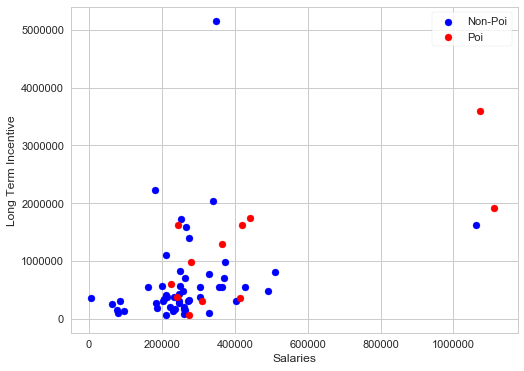

In [19]:
## BONUS VS SALARY

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='long_term_incentive', data=hist[hist['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='long_term_incentive', data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Long Term Incentive')


plt.legend(loc='best',frameon=True);

## EXPENSES

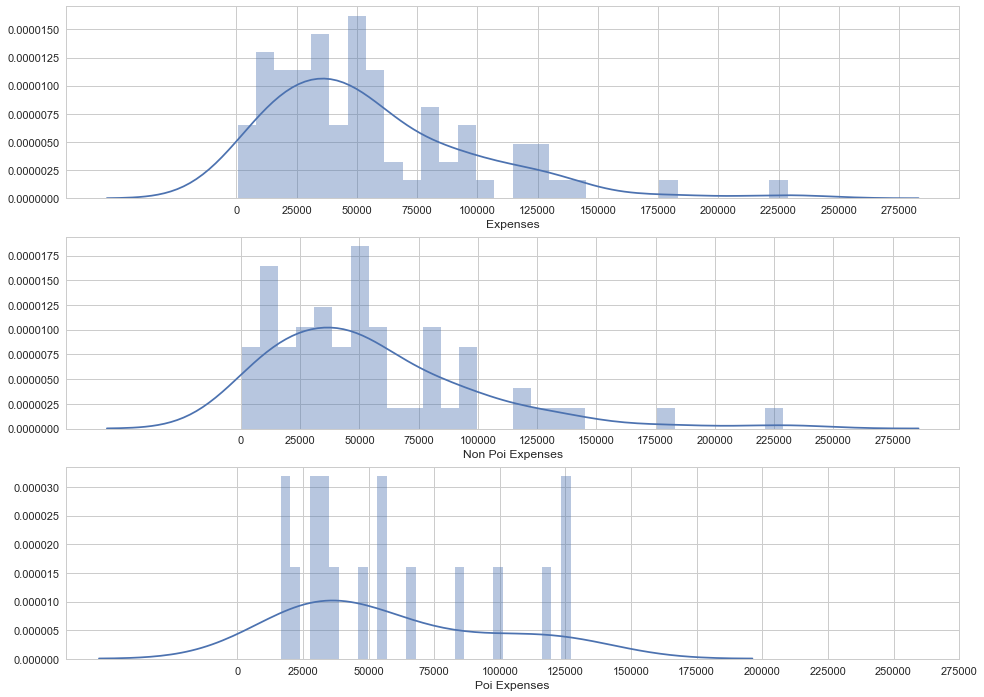

In [20]:
##CREATING A HISTOGRAM OF SALARIES FOR POIS AND NON-POIS AS WELL AS GENERAL DATA

hist = enron_data[enron_data['salary'] < 26704229.0] ###<---OUTLIER!!!!!

sns.set(style='whitegrid', font='sans-serif', font_scale=1.1)

fig,axes = plt.subplots(ncols=1,nrows=3, figsize=(16,12))


ax1 = sns.distplot(hist['expenses'].dropna(), ax=axes[0], bins=30, kde=True, hist=True)
ax1.set_xlabel('Expenses');
ax1.set_xticks(range(0,300000,25000))


ax2 = sns.distplot((hist[hist['poi']==False])['expenses'].dropna(), ax=axes[1], bins=30, kde=True, hist=True)
ax2.set_xlabel('Non Poi Expenses');
ax2.set_xticks(range(0,300000,25000))


ax3 = sns.distplot((hist[hist['poi']==True])['expenses'].dropna(), ax=axes[2], bins=30, kde=True, hist=True)
ax3.set_xlabel('Poi Expenses');
ax3.set_xticks(range(0,300000,25000));

## EXPENSES VS SALARY

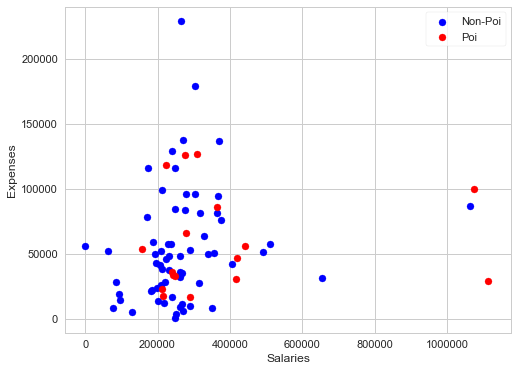

In [21]:
## BONUS VS SALARY

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='expenses', data=hist[hist['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='expenses', data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Expenses')


plt.legend(loc='best',frameon=True);

In [22]:
hist[((hist['poi'] == True) & (hist['salary'] < 200000))]

,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
124,NaN,NaN,NaN,8308552.0,53947.0,NaN,NaN,NaN,NaN,YEAGER F SCOTT,147950.0,True,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0


## DEFERRED INCOME

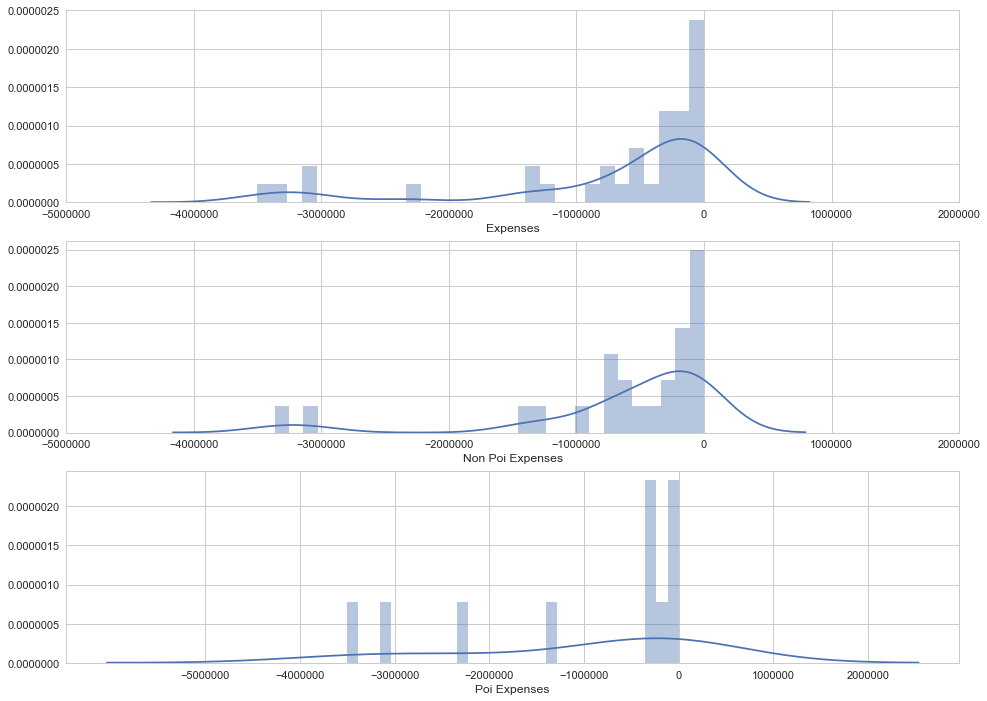

In [23]:
##CREATING A HISTOGRAM OF SALARIES FOR POIS AND NON-POIS AS WELL AS GENERAL DATA

hist = enron_data[enron_data['salary'] < 26704229.0] ###<---OUTLIER!!!!!

sns.set(style='whitegrid', font='sans-serif', font_scale=1.1)

fig,axes = plt.subplots(ncols=1,nrows=3, figsize=(16,12))


ax1 = sns.distplot(hist['deferred_income'].dropna(), ax=axes[0], bins=30, kde=True, hist=True)
ax1.set_xlabel('Expenses');
ax1.set_xticks(range(-5000000,3000000,1000000))


ax2 = sns.distplot((hist[hist['poi']==False])['deferred_income'].dropna(), ax=axes[1], bins=30, kde=True, hist=True)
ax2.set_xlabel('Non Poi Expenses');
ax2.set_xticks(range(-5000000,3000000,1000000))


ax3 = sns.distplot((hist[hist['poi']==True])['deferred_income'].dropna(), ax=axes[2], bins=30, kde=True, hist=True)
ax3.set_xlabel('Poi Expenses');
ax3.set_xticks(range(-5000000,3000000,1000000));

## DEFERRED INCOME VS SALARY

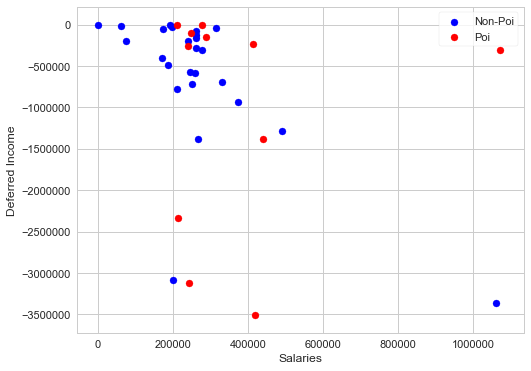

In [24]:
## BONUS VS SALARY

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='deferred_income', data=hist[hist['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='deferred_income', data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Deferred Income')


plt.legend(loc='best',frameon=True);

## EXERCISED STOCK OPTIONS

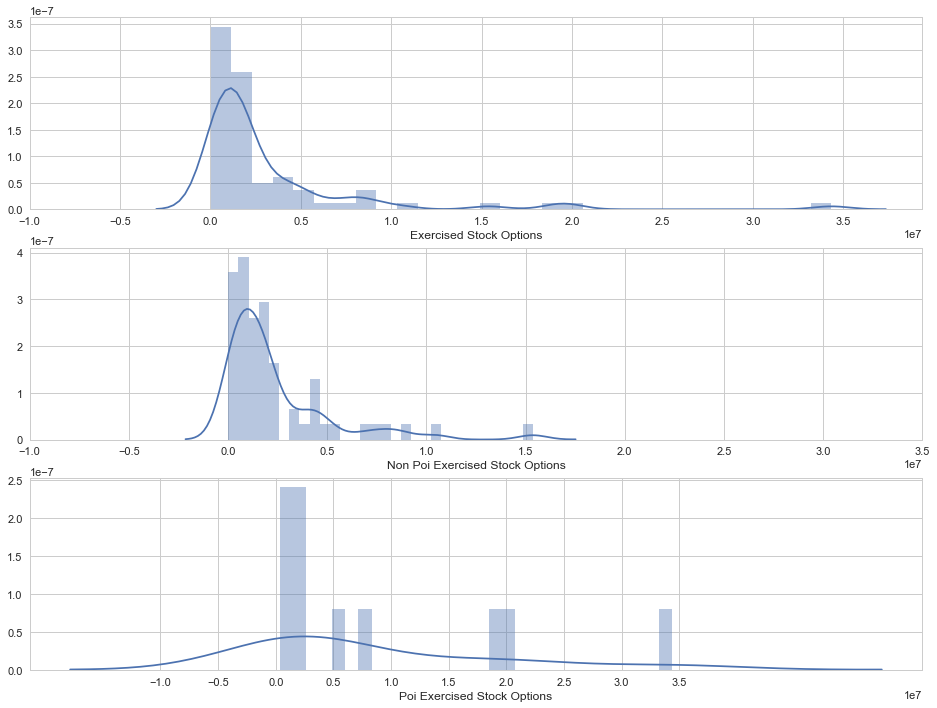

In [25]:
##CREATING A HISTOGRAM OF SALARIES FOR POIS AND NON-POIS AS WELL AS GENERAL DATA

hist = enron_data[enron_data['salary'] < 26704229.0] ###<---OUTLIER!!!!!

sns.set(style='whitegrid', font='sans-serif', font_scale=1.1)

fig,axes = plt.subplots(ncols=1,nrows=3, figsize=(16,12))


ax1 = sns.distplot(hist['exercised_stock_options'].dropna(), ax=axes[0], bins=30, kde=True, hist=True)
ax1.set_xlabel('Exercised Stock Options');
ax1.set_xticks(range(-10000000,40000000,5000000))


ax2 = sns.distplot((hist[hist['poi']==False])['exercised_stock_options'].dropna(), ax=axes[1], bins=30, kde=True, hist=True)
ax2.set_xlabel('Non Poi Exercised Stock Options');
ax2.set_xticks(range(-10000000,40000000,5000000))


ax3 = sns.distplot((hist[hist['poi']==True])['exercised_stock_options'].dropna(), ax=axes[2], bins=30, kde=True, hist=True)
ax3.set_xlabel('Poi Exercised Stock Options');
ax3.set_xticks(range(-10000000,40000000,5000000));

## EXERCISED STOCK OPTIONS VS SALARY

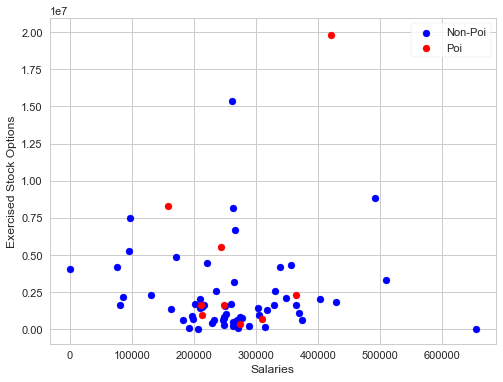

In [26]:
## BONUS VS SALARY

hist2 = enron_data[enron_data['salary'] < 1000000.0]

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='exercised_stock_options', data=hist2[hist2['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='exercised_stock_options', data=hist2[hist2['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Exercised Stock Options')


plt.legend(loc='best',frameon=True);

## RESTRICTED STOCK VS SALARY

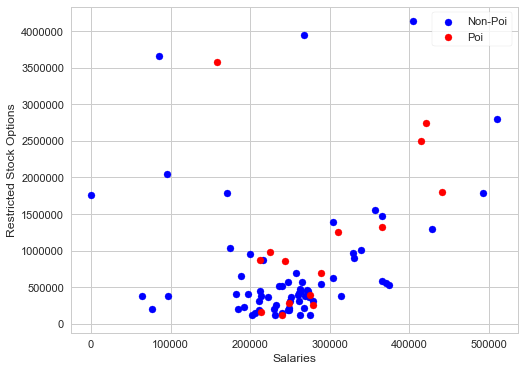

In [27]:
## BONUS VS SALARY

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

hist3 = enron_data[((enron_data['salary'] < 1000000.0) & (enron_data['restricted_stock'] < 8000000.0))]

ax1 = plt.scatter(x='salary',y='restricted_stock', data=hist3[hist3['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='restricted_stock', data=hist3[hist3['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Restricted Stock Options')


plt.legend(loc='best',frameon=True);

## RESTRICTED STOCK  DEFERRED VS SALARY

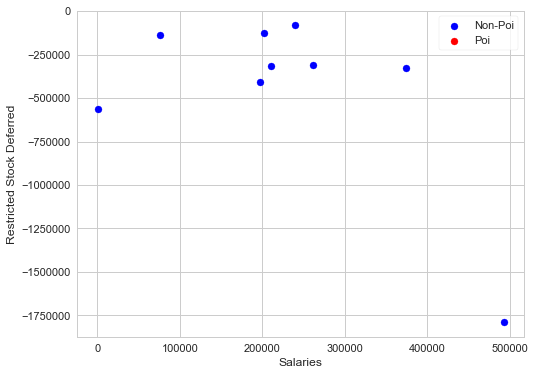

In [28]:
## BONUS VS SALARY

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='restricted_stock_deferred', data=hist[hist['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='restricted_stock_deferred', data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Restricted Stock Deferred')


plt.legend(loc='best',frameon=True);

In [29]:
salary = hist[~hist['salary'].isnull()]

a = salary[~salary['restricted_stock_deferred'].isnull()]

a[['name','salary','restricted_stock_deferred','poi']]

#help(pd.DataFrame.loc)

,name,salary,restricted_stock_deferred,poi
8,HAEDICKE MARK E,374125.0,-329825.0,False
9,PIPER GREGORY F,197091.0,-409554.0,False
44,DETMERING TIMOTHY J,210500.0,-315068.0,False
48,BANNANTINE JAMES M,477.0,-560222.0,False
108,ALLEN PHILLIP K,201955.0,-126027.0,False
115,REYNOLDS LAWRENCE,76399.0,-140264.0,False
118,CARTER REBECCA C,261809.0,-307301.0,False
127,DERRICK JR. JAMES V,492375.0,-1787380.0,False
131,BAY FRANKLIN R,239671.0,-82782.0,False


In [30]:
a['salary'].max()

492375.0

There seems to be too little data on Resticted Stock deferred to make a good accounting. I fear what 'NaN''s might do to predictions.

## SHARED RECEIPT WITH POI VS SALARY

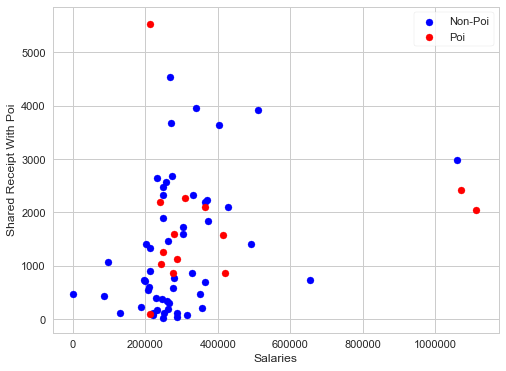

In [31]:
## BONUS VS SALARY

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='shared_receipt_with_poi', data=hist[hist['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='shared_receipt_with_poi', data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Shared Receipt With Poi')


plt.legend(loc='best',frameon=True);

## TOTAL PAYMENTS VS SALARY

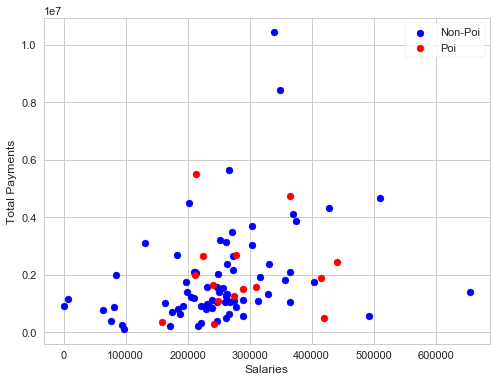

In [32]:
## BONUS VS SALARY

hist2 = hist[hist['salary'] < 1000000] #Removing some outliers on salaries to better see distribution

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='total_payments', data=hist2[hist2['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='total_payments', data=hist2[hist2['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Total Payments')


plt.legend(loc='best',frameon=True);

In [33]:
hist[hist['salary'] > 1000000]

,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,name,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
64,7000000.0,202911.0,-300000.0,34348384.0,99832.0,36.0,123.0,16.0,3600000.0,LAY KENNETH L,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
95,5600000.0,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,SKILLING JEFFREY K,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
128,2000000.0,6426990.0,-3367011.0,10433518.0,86987.0,21.0,242.0,6.0,1617011.0,FREVERT MARK A,7427621.0,False,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0


## TOTAL STOCK VALUE VS SALARY

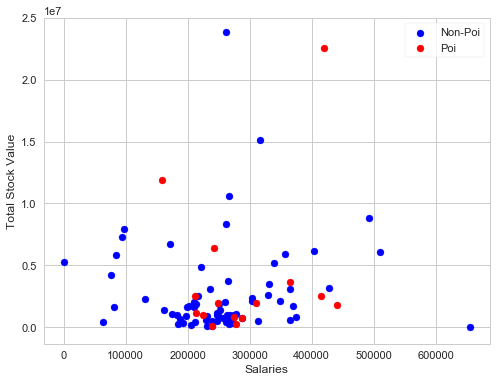

In [34]:
## BONUS VS SALARY

hist2 = hist[hist['salary'] < 1000000] #Removing some outliers on salaries to better see distribution

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='total_stock_value', data=hist2[hist2['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='total_stock_value', data=hist2[hist2['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('Total Stock Value')


plt.legend(loc='best',frameon=True);

## TO POI MESSAGE VS FROM POI MESSAGES

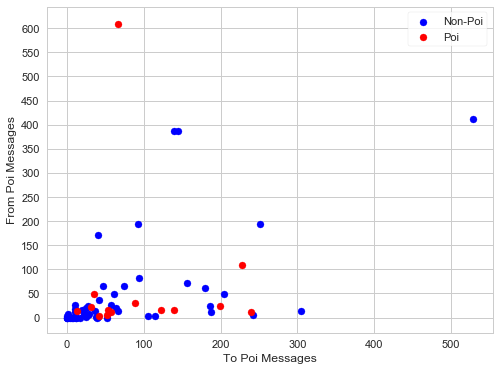

In [35]:
## TO POI MESSAGE VS FROM POI MESSAGES

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 =plt.scatter(x='from_poi_to_this_person',y='from_this_person_to_poi',data=hist[hist['poi'] == False],color='b',label='Non-Poi')
ax2 =plt.scatter(x='from_poi_to_this_person',y='from_this_person_to_poi', data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('To Poi Messages')
ax1.axes.set_ylabel('From Poi Messages')
ax1.axes.set_yticks(range(0,650,50))


plt.legend(loc='best',frameon=True);

### SOME FEATURE ENGINEERING

In [36]:
def message_ratio(poi_messages,total_messages,person,data):
        
        total_message_no = data[person][total_messages]
        poi_message_no = data[person][poi_messages]
        
        if total_message_no !='NaN' and total_message_no !=0 and total_message_no != None and \
                     poi_message_no !='NaN' and poi_message_no !=0 and poi_message_no!=None:
                return (poi_message_no  / total_message_no)
        return 0.0
    
for person in data_dict:
    data_dict[person]['from_poi_message_ratio'] = message_ratio('from_this_person_to_poi','from_messages', person, data_dict)
    data_dict[person]['to_poi_message_ratio'] = message_ratio('from_poi_to_this_person','to_messages', person, data_dict)

In [37]:
enron_df['from_poi_message_ratio'] = enron_df['from_this_person_to_poi'] / enron_df['from_messages']

enron_df['to_poi_message_ratio'] = enron_df['from_poi_to_this_person'] / enron_df['to_messages']

In [38]:
enron_data['from_poi_message_ratio'] = enron_data['from_this_person_to_poi'] / enron_data['from_messages']

enron_data['to_poi_message_ratio'] = enron_data['from_poi_to_this_person'] / enron_data['to_messages']

## FROM POI MESSAGE RATIO VS SALARY

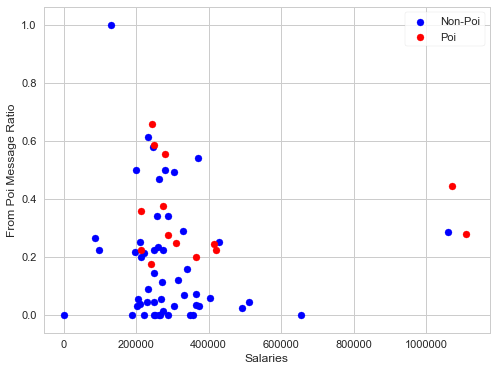

In [39]:
## SALARY VS From Poi Message Ratio

hist = enron_data[enron_data['salary'] < 26704229.0]

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='salary',y='from_poi_message_ratio', data=hist[hist['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='salary',y='from_poi_message_ratio', data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('Salaries')
ax1.axes.set_ylabel('From Poi Message Ratio')


plt.legend(loc='best',frameon=True);

## TO POI MESSAGE RATIO VS FROM POI MESSAGE RATIO 

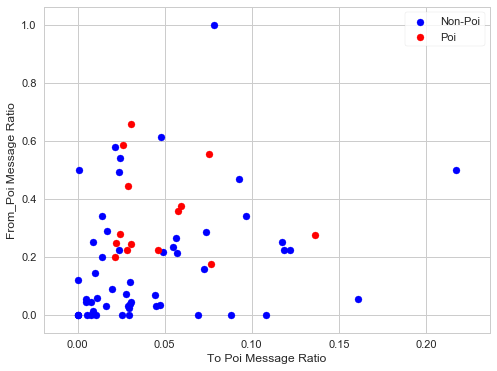

In [40]:
## TO POI MESSAGE RATIO VS FROM POI MESSAGE RATIO 

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='to_poi_message_ratio',y='from_poi_message_ratio', data=hist[hist['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='to_poi_message_ratio',y='from_poi_message_ratio', data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('To Poi Message Ratio')
ax1.axes.set_ylabel('From_Poi Message Ratio')


plt.legend(loc='best',frameon=True);

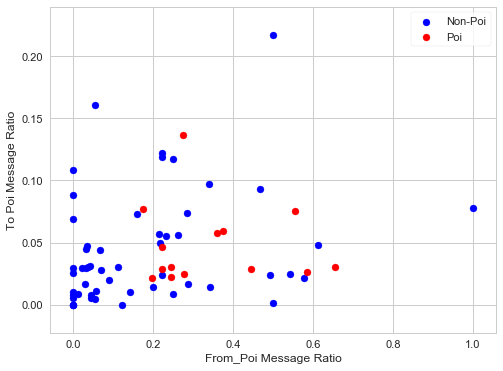

In [41]:
## BONUS VS SALARY

import matplotlib.pyplot as plt 
%matplotlib inline

hist = enron_data[enron_data['salary'] < 26704229.0]

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,6))

ax1 = plt.scatter(x='from_poi_message_ratio',y='to_poi_message_ratio', data=hist[hist['poi'] == False], color='b', label='Non-Poi')
ax2 = plt.scatter(x='from_poi_message_ratio',y='to_poi_message_ratio', data=hist[hist['poi'] == True], color='r', label='Poi')

ax1.axes.set_xlabel('From_Poi Message Ratio')
ax1.axes.set_ylabel('To Poi Message Ratio')


plt.legend(loc='best',frameon=True);

# APPLYING MACHINE LEARNING

## FUNCTION DEFINITIONS

### REMOVE NONE

In [55]:
%matplotlib inline

In [42]:
def remove_none(data):

    for person in data:
        data[person]['name'] = person
        for feature in data[person]:
            if data[person][feature]=='NaN' or data[person][feature]=='' or data[person][feature]==None:
                data[person][feature] = 'NaN'
        #enron_list.append(data[person])

    type(data_dict['METTS MARK']['deferral_payments'])

### GET METRICS

In [88]:
##mine

def get_metrics(label, prediction):
    comparison_list = list(zip(label,prediction))

    print('Total Test Items: ',len(comparison_list))

    true_positive = len([p for p in comparison_list if p[0] == p[1] and p[1] == 1])
    true_negative = len([p for p in comparison_list if p[0] == p[1] and p[1] == 0])
    false_positive = len([p for p in comparison_list if p[0] != p[1] and p[1] == 1])
    false_negative = len([p for p in comparison_list if p[0] != p[1] and p[1] == 0])

    print('(TruePositive, TrueNegative, FalsePositive, FalseNegative):',\
          (true_positive, true_negative, false_positive, false_negative))
    try:
        if true_positive !=0 and (true_positive+false_positive != 0):
            precision = true_positive/(true_positive + false_positive)
            
        elif true_positive==0 and false_positive==0:
            precision = 1.0
        
        elif true_positive==0:
            precision = 0.0

    except ZeroDivisionError:
        precision = 'N/A'
        
    try:
        if true_positive !=0 and (true_positive+false_negative != 0):
            recall = true_positive/(true_positive + false_negative)
            
        elif true_positive==0 and false_negative==0:
            recall = 1.0
        
        elif true_positive==0:
            recall = 0.0

    except ZeroDivisionError:
        recall = 'N/A'
        
    if precision != 'N/A' and recall != 'N/A': 
        f1_score = (2*precision*recall)/(precision + recall)
    
    else:
        f1_score = 'N/A'   

    print('Accuracy:',accuracy_score(labels_test, predictions))
    print('Recall:', recall)
    print('Precision:', precision)
    print('f1_score:', f1_score)

### A:B RATIO

In [76]:
def a_to_b_ratio(a_total,b_total,person,data):
        
        a_total = data[person][a_total]
        b_total = data[person][b_total]
        
        if a_total !='NaN' and a_total !=0 and a_total != None and \
                     b_total !='NaN' and b_total !=0 and b_total!=None:
                return (a_total  / b_total)
        return 0.0

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import ShuffleSplit

def grid_search(features,labels,classifier,cv,param_grid):
    GridSearchCV(clf=classifier, 
                 param_grid=param_grid,
                 cv=cv,
                 score_func=f1_score)
    return grid_search.best_estimator_

### BEGIN

In [78]:
#2   

import pickle
### Load the dictionary containing the dataset        #IMPORTED
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
                                                
##fxn        
remove_none(data_dict)
                                                    ##############

In [79]:
#poi_id.py #1
#!/usr/bin/python

import sys
import pickle
sys.path.append("tools/")
sys.path.append("final_project/")


from feature_format import featureFormat, targetFeatureSplit
from tester import *

### Task 1: Select what features you'll use.          #ANALYSIS
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

all_features_list = list(data_dict[(list(data_dict.keys())[0])].keys())

all_features_list.remove('email_address')
all_features_list.remove('name')

for i in range(len(all_features_list)):
    if all_features_list[i] == 'poi':
        all_features_list[i] = all_features_list[0]
        all_features_list[0] = 'poi'

features_list = all_features_list


#features_list = ['poi','salary', 'bonus','to_messages', 'deferral_payments','total_payments','loan_advances', \
 #                'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', \
  #                'from_poi_to_this_person','exercised_stock_options','from_messages', 'from_this_person_to_poi', \
   #              'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'] 

# You will need to use more features                    
                                                    ##############   

In [80]:
data_dict.keys()

data_dict['THE TRAVEL AGENCY IN THE PARK']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'name': 'THE TRAVEL AGENCY IN THE PARK',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

### Task 2: Remove outliers                         
#3
#IMPORTED

#OUTLIERS NOTED

In [81]:
data_dict.pop('TOTAL')
data_dict.pop('THE TRAVEL AGENCY IN THE PARK');
                                          ##############

### Task 3: Create new feature(s)                   

#4

#CREATED

#My new message ratio feature

In [82]:
for person in data_dict:
    data_dict[person]['from_poi_message_ratio'] = a_to_b_ratio('from_this_person_to_poi','from_messages', person, data_dict)
    data_dict[person]['to_poi_message_ratio'] = a_to_b_ratio('from_poi_to_this_person','to_messages', person, data_dict)
    data_dict[person]['salary_to_bonus_ratio'] = a_to_b_ratio('salary','bonus', person, data_dict)
    data_dict[person]['salary_to_long_term_incentive'] = a_to_b_ratio('salary','long_term_incentive', person, data_dict)
    
for a in ['from_poi_message_ratio', 'to_poi_message_ratio', 'salary_to_bonus_ratio', 'salary_to_long_term_incentive']:
    features_list.append(a) 


### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys=True, remove_NaN=True)
labels, features = targetFeatureSplit(data)

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

selector = SelectKBest(k=5)
selector.fit(features_train,labels_train)

#features_train = selector.transform(features_train)
#features_test = selector.transform(features_test)

f_list = features_list

#f_list.remove('poi')

feats = list(zip(selector.get_support(),f_list))

for f in feats:
    if f[0]:
        print(f)

(True, 'loan_advances')
(True, 'deferred_income')
(True, 'from_this_person_to_poi')
(True, 'long_term_incentive')
(True, 'director_fees')


### CLASSIFIER: GAUSSIAN NAIVE BAYES

In [95]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
    
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=8)
selector.fit(features_train,labels_train)


feature_list = []
i=0
for i, supported in enumerate(selector.get_support()):
    if supported == True:
        feature_list.append(features_list[i])

feature_list.append('poi')
feature_list[-1] = feature_list[0]
feature_list[0] = 'poi'

features_train = selector.transform(features_train)
features_test = selector.transform(features_test)

#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#features_train = min_max_scaler.fit_transform(features_train)
#features_test = min_max_scaler.transform(features_test)
#print('Done \n')

### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
from time import time

clf = GaussianNB()

                                              ############

t0 = time()
clf.fit(features_train,labels_train)
print('Training Time: ',round(time()-t0,3),'s')
#dump_classifier_and_data(clf, my_dataset, feature_list)
                                              ############

from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score

predictions = clf.predict(features_test)



t0 = time()
predictions = clf.predict(features_test)
print('Prediction Time: ',round(time()-t0,3),'s\n')

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, feature_list)

Training Time:  0.001 s
Prediction Time:  0.0 s



In [98]:
try:
    get_metrics(labels_train, predictions)
except ZeroDivisionError:
    print('Zero')

print('\n\nMetrics:')
get_metrics(labels_test, predictions)

t0=time()
print('\n\nRunning Tester Script \n\n')
%run final_project/tester.py
print('Run Time: ',round(time()-t0,3),'s\n')

Total Test Items:  43
(TruePositive, TrueNegative, FalsePositive, FalseNegative): (1, 30, 5, 7)
Accuracy: 0.883720930233
Recall: 0.125
Precision: 0.16666666666666666
f1_score: 0.14285714285714288


Metrics:
Total Test Items:  43
(TruePositive, TrueNegative, FalsePositive, FalseNegative): (3, 35, 3, 2)
Accuracy: 0.883720930233
Recall: 0.6
Precision: 0.5
f1_score: 0.5454545454545454


Running Tester Script 


GaussianNB(priors=None)
	Accuracy: 0.38154	Precision: 0.18157	Recall: 0.86100	F1: 0.29990	F2: 0.49245
	Total predictions: 13000	True positives: 1722	False positives: 7762	False negatives:  278	True negatives: 3238

Run Time:  0.883 s



#### BEST PERFORMANCE:
    At k=10:
        Accuracy: 0.36314, Precision: 0.16795, Recall: 0.87450, F1: 0.28178, F2: 0.47491,
                            Total predictions: 14000
                                True positives: 1749
                                False positives: 8665
                                False negatives:  251
                                True negatives: 3335
Run Time:  0.907 s

Run time is pretty short and almost immeditely produces results    

### CLASSIFIER: SVM

In [ ]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import GridSearchCV
    
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

print('Selecting....')
selector = SelectKBest(k=10)
selector.fit(features_train,labels_train)
features_train = selector.transform(features_train)
features_test = selector.transform(features_test)
print('Done \n')


print('Scaling.....')
min_max_scaler = MinMaxScaler()
features_train = min_max_scaler.fit_transform(features_train)
features_test = min_max_scaler.fit_transform(features_test)
print('Done \n')


feature_list = []
i=0
for i, supported in enumerate(selector.get_support()):
    if supported == True:
        feature_list.append(features_list[i])

print('Dumping Data....')
classifier = SVC()
parameters = {'kernel':('rbf', 'linear'), 'C':[1,100,900]}

clf = GridSearchCV(classifier,parameters)
dump_classifier_and_data(clf, my_dataset, feature_list)
print('Done \n')
                                             ############
    
print('Training...\n')
#clf = SVC(kernel='linear',C=1)
t0=time()
clf.fit(features_train,labels_train)
print('Training Time: ',round(time()-t0,3),'s')

                                              ############

#from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score

t0=time()
predictions = clf.predict(features_test)
print('Prediction Time: ',round(time()-t0,3),'s\n')

try:
    get_metrics(labels_test, predictions)
except ZeroDivisionError:
    print('True positives is 0')

print('\n\nRunning Tester Script \n\n')

%run final_project/tester.py

clf.best_params_

Selecting....
Done 

Scaling.....
Done 

Dumping Data....
Done 

Training...

Training Time:  0.048 s
Prediction Time:  0.0 s

Total Test Items:  43
(TruePositive, TrueNegative, FalsePositive, FalseNegative): (0, 38, 0, 5)
Accuracy: 0.883720930233
Recall: 0.0
Precision: 1.0
f1_score: 0.0

\Running Tester Script 




#### BEST PERFORMANCE:
    At k=20, {'n_neighbors': 3, 'weights': 'distance'}:
        Accuracy: 0.86147, Precision: 0.39045	Recall: 0.06950	F1: 0.11800	F2: 0.08317
        Total predictions: 15000
        True positives:  139
        False positives:  217
        False negatives: 1861
        True negatives: 12783
        
Run Time:  0.907 s

### KNN

In [106]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  

from sklearn.metrics import precision_score,recall_score

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
    
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=20)
selector.fit(features,labels)

feature_list = []
i=0
for i, supported in enumerate(selector.get_support()):
    if supported == True:
        feature_list.append(features_list[i])

feature_list.append('poi')
feature_list[-1] = feature_list[0]
feature_list[0] = 'poi'

features_train = selector.transform(features_train)
features_test = selector.transform(features_test)
min_max_scaler = MinMaxScaler()

features_train = min_max_scaler.fit_transform(features_train)
features_test = min_max_scaler.fit_transform(features_test)



classifier = KNeighborsClassifier()
parameters = {'n_neighbors':[2,3,10], 'weights':('distance','uniform')}

clf = GridSearchCV(classifier,param_grid=parameters)
clf.fit(features_train,labels_train)
dump_classifier_and_data(clf, my_dataset, feature_list)
                                             ############

t0=time()
clf.fit(features_train,labels_train)
print('Training Time: ',round(time()-t0,3),'s')

                                              ############

#from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score

t0=time()
predictions = clf.predict(features_test)
print('Prediction Time: ',round(time()-t0,3),'s\n')

try:
    get_metrics(labels_test, predictions)
except ZeroDivisionError:
    print ('f1: error')

t0=time()
print('\n\nRunning Tester Script \n\n')
%run final_project/tester.py
print('Run Time: ',round(time()-t0,3),'s\n')

clf.best_params_

Training Time:  0.05 s
Prediction Time:  0.005 s

Total Test Items:  43
(TruePositive, TrueNegative, FalsePositive, FalseNegative): (0, 38, 0, 5)
Accuracy: 0.883720930233
Recall: 0.0
Precision: 1.0
f1_score: 0.0


Running Tester Script 


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 10], 'weights': ('distance', 'uniform')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
	Accuracy: 0.85587	Precision: 0.16803	Recall: 0.02050	F1: 0.03654	F2: 0.02487
	Total predictions: 15000	True positives:   41	False positives:  203	False negatives: 1959	True negatives: 12797

Run Time:  42.079 s



{'n_neighbors': 10, 'weights': 'distance'}

#### BEST PERFORMANCE:
    At k=20, {'n_neighbors': 3, 'weights': 'distance'}:
        Accuracy: 0.86147, Precision: 0.39045	Recall: 0.06950	F1: 0.11800	F2: 0.08317
        Total predictions: 15000
        True positives:  139
        False positives:  217
        False negatives: 1861
        True negatives: 1278
        
Run Time:  38.7 s

### CLASSIFIER: DECISION TREE

In [102]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier                                         


from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
    
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=20)
selector.fit(features,labels)

feature_list = []
i=0
for i, supported in enumerate(selector.get_support()):
    if supported == True:
        feature_list.append(features_list[i])

feature_list.append('poi')
feature_list[-1] = feature_list[0]
feature_list[0] = 'poi'

features_train = selector.transform(features_train)
features_test = selector.transform(features_test)



                                ################################


classifier = DecisionTreeClassifier()
parameters = {'criterion':('gini', 'entropy'), 'min_samples_split':[40,45,47]}

clf = GridSearchCV(classifier,parameters)
dump_classifier_and_data(clf, my_dataset, feature_list)
                                             ############
t0=time()
clf.fit(features_train,labels_train)
print('Training Time: ',round(time()-t0,3),'s')

                                              ############

#from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score

t0=time()
predictions = clf.predict(features_test)
print('Prediction Time: ',round(time()-t0,3),'s\n')

get_metrics(labels_test, predictions)

t0=time()
print('\n\nRunning Tester Script \n\n')
%run final_project/tester.py
print('Run Time: ',round(time()-t0,3),'s\n')

clf.best_params_

Training Time:  0.051 s
Prediction Time:  0.001 s

Total Test Items:  43
(TruePositive, TrueNegative, FalsePositive, FalseNegative): (1, 38, 0, 4)
Accuracy: 0.906976744186
Recall: 0.2
Precision: 1.0
f1_score: 0.33333333333333337


Running Tester Script 


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'min_samples_split': [40, 45, 47]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
	Accuracy: 1.00000	Precision: 1.00000	Recall: 1.00000	F1: 1.00000	F2: 1.00000
	Total predictions: 1

{'criterion': 'entropy', 'min_samples_split': 40}

#### BEST PERFORMANCE:
    At k=20, {'criterion': 'entropy', 'min_samples_split': 40}:
       Accuracy: 1.00000	Precision: 1.00000	Recall: 1.00000	F1: 1.00000	F2: 1.00000
                    Total predictions: 15000
                    True positives: 2000
                    False positives:    0
                    False negatives:    0
                    True negatives: 13000

Run Time:  24.894 s

### RANDOM FORESTS

In [110]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier                                         


from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
    
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=20)
selector.fit(features,labels)

feature_list = []
i=0
for i, supported in enumerate(selector.get_support()):
    if supported == True:
        feature_list.append(features_list[i])

feature_list.append('poi')
feature_list[-1] = feature_list[0]
feature_list[0] = 'poi'

features_train = selector.transform(features_train)
features_test = selector.transform(features_test)




                                ##########################


classifier = RandomForestClassifier(criterion='entropy',n_estimators =100) #'criterion':('entropy','gini'),'n_estimators':[10,30,50,100],
parameters = {'min_samples_split':[20,30,40]}

clf = GridSearchCV(classifier,parameters)
dump_classifier_and_data(clf, my_dataset, feature_list)
                                             ############
t0=time()
clf.fit(features_train,labels_train)
print('Training Time: ',round(time()-t0,3),'s')

                                              ############

#from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score

t0=time()
predictions = clf.predict(features_test)
print('Prediction Time: ',round(time()-t0,3),'s\n')

try:
    get_metrics(labels_test, predictions)
except ZeroDivisionError:
    print('true_positives = 0')
    
t0=time()
print('\n\nRunning Tester Script \n\n')
%run final_project/tester.py
print('Run Time: ',round(time()-t0,3),'s\n')

clf.best_params_   ###LONG TIME TO PROCESSS!!!

Training Time:  5468.322 s
Prediction Time:  0.002 s

Total Test Items:  43
(TruePositive, TrueNegative, FalsePositive, FalseNegative): (0, 38, 0, 5)
Accuracy: 0.883720930233
Recall: 0.0
Precision: 1.0
f1_score: 0.0


Running Tester Script 


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
	Accuracy: 0.97200	Precision: 0.99937	Recall: 0.79050	F1: 0.88275	F2: 0

{'min_samples_split': 20}

#### BEST PERFORMANCE:
    At k=20, {'min_samples_split': 40, 'n_estimators': 30}:
        Accuracy: 0.96007	Precision: 0.99366	Recall: 0.70500	F1: 0.82480	F2: 0.74849
        Total predictions: 15000
        True positives: 1410
        False positives:    9
        False negatives:  590
          True negatives: 12991
        
    Run Time:  897.145 s -  997.68 s

### ADABOOST

In [66]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier                                         



from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
    
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=20)
selector.fit(features,labels)

feature_list = []
i=0
for i, supported in enumerate(selector.get_support()):
    if supported == True:
        feature_list.append(features_list[i])

feature_list.append('poi')
feature_list[-1] = feature_list[0]
feature_list[0] = 'poi'

features_train = selector.transform(features_train)
features_test = selector.transform(features_test)


                                #################################

classifier = AdaBoostClassifier()
parameters = {'n_estimators':[9,15,30,100]}

clf = GridSearchCV(classifier,parameters)
dump_classifier_and_data(clf, my_dataset, feature_list)

                                             ############
t0=time()
clf.fit(features_train,labels_train)
print('Training Time: ',round(time()-t0,3),'s')

                                              ############

#from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score

t0=time()
predictions = clf.predict(features_test)
print('Prediction Time: ',round(time()-t0,3),'s\n')

get_metrics(labels_test, predictions)
print('THEIRS \n\n')

t0=time()
print('\n\Running Tester Script \n\n')
%run final_project/tester.py
print('Run Time: ',round(time()-t0,3),'s\n')

clf.best_params_

Training Time:  0.661 s
Prediction Time:  0.008 s

Total Test Items:  43
(TruePositive, TrueNegative, FalsePositive, FalseNegative): (1, 36, 2, 4)
Accuracy: 0.860465116279
Recall: 0.2
Precision: 0.3333333333333333
f1_score: 0.25
THEIRS 



\Running Tester Script 


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [9, 15, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
	Accuracy: 1.00000	Precision: 1.00000	Recall: 1.00000	F1: 1.00000	F2: 1.00000
	Total predictions: 15000	True positives: 2000	False positives:    0	False negatives:    0	True negatives: 13000

Run Time:  27.454 s



{'n_estimators': 100}

#### BEST PERFORMANCE:
    At k=20, {'n_estimators': 100}:
        Accuracy: 1.00000  Precision: 1.00000	 Recall: 1.00000 	F1: 1.00000 	F2: 1.00000
        Total predictions: 15000
        True positives:  2000
        False positives:  0
        False negatives: 0
        True negatives: 13000
        
Run Time:  27.454 s

### LOGISTIC REGRESSION

In [111]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
    
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=23)
selector.fit(features,labels)

feature_list = []
i=0
for i, supported in enumerate(selector.get_support()):
    if supported == True:
        feature_list.append(features_list[i])

feature_list.append('poi')
feature_list[-1] = feature_list[0]
feature_list[0] = 'poi'

features_train = selector.transform(features_train)
features_test = selector.transform(features_test)



classifier = LogisticRegression()

parameters = {'C':[0.01,0.1, 10, 1000, 100]}

clf = GridSearchCV(classifier,parameters)

dump_classifier_and_data(clf, my_dataset, feature_list)

                                             ############
clf.fit(features_train,labels_train)
print('Training Time: ',round(time()-t0,3),'s')

                                              ############

#from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score

t0=time()
predictions = clf.predict(features_test)
print('Prediction Time: ',round(time()-t0,3),'s\n')

get_metrics(labels_test, predictions)

t0=time()
print('\n\nRunning Tester Script \n\n')
%run final_project/tester.py
print('Run Time: ',round(time()-t0,3),'s\n')

clf.best_params_

Training Time:  37314.934 s
Prediction Time:  0.0 s

Total Test Items:  43
(TruePositive, TrueNegative, FalsePositive, FalseNegative): (2, 31, 7, 3)
Accuracy: 0.767441860465
Recall: 0.4
Precision: 0.2222222222222222
f1_score: 0.2857142857142857


Running Tester Script 


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 10, 1000, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
	Accuracy: 0.78400	Precision: 0.18107	Recall: 0.17600	F1: 0.17850	F2: 0.17699
	Total predictions: 15000	True positives:  352	False positives: 1592	False negatives: 1648	True negatives: 11408

Run Time:  5

{'C': 100}

#### BEST PERFORMANCE:
    At k=10, {'n_neighbors': 3, 'weights': 'distance'}:
        Accuracy: 0.86147, Precision: 0.39045	Recall: 0.06950	F1: 0.11800	F2: 0.08317
        Total predictions: 15000
        True positives:  139
        False positives:  217
        False negatives: 1861
        True negatives: 12783

## TESTS ON BIAS VARIANCE

In [ ]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
    
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=10)
selector.fit(features_train,labels_train)

feature_list = []
i=0
for i, supported in enumerate(selector.get_support()):
    if supported == True:
        feature_list.append(features_list[i])

feature_list.append('poi')
feature_list[-1] = feature_list[0]
feature_list[0] = 'poi'

features_train = selector.transform(features_train)
features_test = selector.transform(features_test)



classifier = LogisticRegression()
parameters = {'C':[100, 200, 300]}

dump_classifier_and_data(clf, my_dataset, feature_list)

clf = GridSearchCV(classifier,parameters)

test = []
train = []
size = []
best=[]
                                             ############
for i in (range(20,len(features_train)+1,1)):
    clf.fit(features_train[0:i],labels_train[0:i])
    
    predictions_test = clf.predict(features_test)
    predictions_train = clf.predict(features_train) 
    
    #acc_test= accuracy_score(labels_test,predictions_test)
    #acc_train = accuracy_score(labels_train,predictions_train)
    
    #test.append(acc_test)
    #train.append(acc_train)
    best.append((i,clf.best_params_['C']))
    size.append(i)
    
    test.append(mean_squared_error(labels_test,predictions_test))
    train.append(mean_squared_error(labels_train,predictions_train))
    
    

                                              ############
plt.figure(figsize=(10,8))
plt.plot(size,test,color='r',label='test')
plt.plot(size,train,color='g',label='train')
plt.grid(True)
plt.legend(loc='best');
plt.xlabel('Size Of Data Set')
plt.ylabel('Error');

get_metrics(labels_test, predictions)

t0=time()
print('\n\Running Tester Script \n\n')
%run final_project/tester.py
print('Run Time: ',round(time()-t0,3),'s\n')

clf.best_params_

#### BEST PERFORMANCE:
    At k=10, {'n_neighbors': 3, 'weights': 'distance'}:
        Accuracy: 0.86147, Precision: 0.39045	Recall: 0.06950	F1: 0.11800	F2: 0.08317
        Total predictions: 15000
        True positives:  139
        False positives:  217
        False negatives: 1861
        True negatives: 12783

In [ ]:
mean_squared_error(labels_test,predictions_test)

In [ ]:
help(LogisticRegression)

In [ ]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
    
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=10)
selector.fit(features_train,labels_train)

feature_list = []
i=0
for i, supported in enumerate(selector.get_support()):
    if supported == True:
        feature_list.append(features_list[i])

feature_list.append('poi')
feature_list[-1] = feature_list[0]
feature_list[0] = 'poi'

features_train = selector.transform(features_train)
features_test = selector.transform(features_test)



classifier = LogisticRegression()
parameters = {'C':[100, 200, 300]}

dump_classifier_and_data(clf, my_dataset, feature_list)

clf = GridSearchCV(classifier,parameters)

test = []
train = []
size = []
best=[]
                                             ############
for i in (range(20,len(features_train)+1,1)):
    clf.fit(features_train[0:i],labels_train[0:i])
    
    predictions_test = clf.predict(features_test)
    predictions_train = clf.predict(features_train) 
    
    #acc_test= accuracy_score(labels_test,predictions_test)
    #acc_train = accuracy_score(labels_train,predictions_train)
    
    #test.append(acc_test)
    #train.append(acc_train)
    best.append((i,clf.best_params_['C']))
    size.append(i)
    
    test.append(mean_squared_error(labels_test,predictions_test))
    train.append(mean_squared_error(labels_train,predictions_train))
    
    

                                              ############
plt.figure(figsize=(10,8))
plt.plot(size,test,color='r',label='test')
plt.plot(size,train,color='g',label='train')
plt.grid(True)
plt.legend(loc='best');
plt.xlabel('Size Of Data Set')
plt.ylabel('Error');

get_metrics(labels_test, predictions)

t0=time()
print('\n\Running Tester Script \n\n')
%run final_project/tester.py
print('Run Time: ',round(time()-t0,3),'s\n')

clf.best_params_